<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/TRANF_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.2 Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta), la transfor- ´
mada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT). Considere las diferentes combinaciones entre: espectro continuo y
discreto y senal en tiempo continuo y discreto. Adem ˜ as, con- ´
sulte en que consiste el algoritmo ´ Fast Fourier Transform -
(FFT) y su utilidad para el calculo de la transformada dis- ´
creta de Fourier. Explique en detalle el algoritmo FFT y su
costo computacional vs el de la transformada discreta. Ver
cuaderno Transformada de Fourier


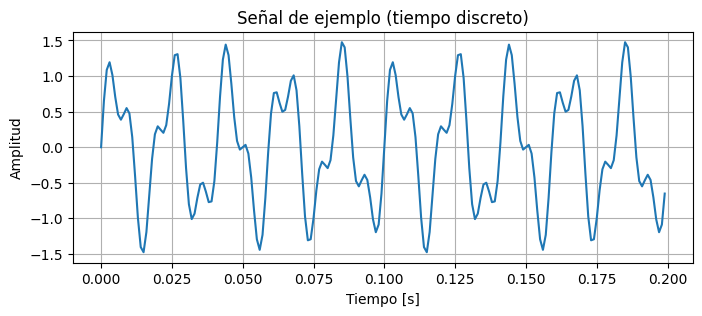

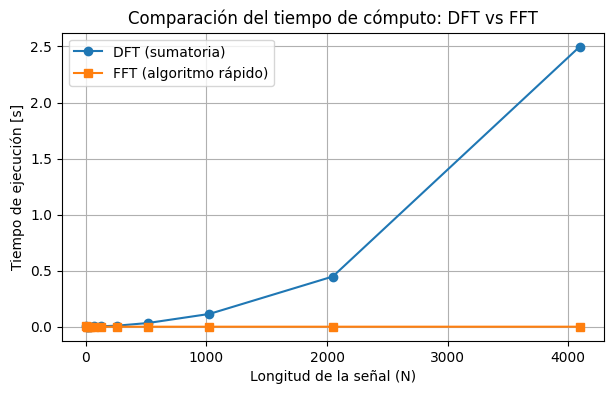

N=    4 -> DFT: 0.004901s, FFT: 0.003272s, Aceleración ≈    1.5x
N=    8 -> DFT: 0.000089s, FFT: 0.000044s, Aceleración ≈    2.0x
N=   16 -> DFT: 0.000053s, FFT: 0.000034s, Aceleración ≈    1.6x
N=   32 -> DFT: 0.000163s, FFT: 0.000036s, Aceleración ≈    4.5x
N=   64 -> DFT: 0.003595s, FFT: 0.000098s, Aceleración ≈   36.7x
N=  128 -> DFT: 0.004119s, FFT: 0.000102s, Aceleración ≈   40.5x
N=  256 -> DFT: 0.009266s, FFT: 0.000121s, Aceleración ≈   76.8x
N=  512 -> DFT: 0.032784s, FFT: 0.000133s, Aceleración ≈  246.4x
N= 1024 -> DFT: 0.114053s, FFT: 0.000174s, Aceleración ≈  655.3x
N= 2048 -> DFT: 0.447810s, FFT: 0.000229s, Aceleración ≈ 1952.4x
N= 4096 -> DFT: 2.497693s, FFT: 0.000283s, Aceleración ≈ 8825.7x


In [ ]:
# ===========================================================
# 1.2 Comparación Serie y Transformadas de Fourier
# ===========================================================

import numpy as np
import matplotlib.pyplot as plt
import time

# -----------------------------------------------------------
# Definiciones teóricas (solo como referencia en comentarios)
# -----------------------------------------------------------
"""
Serie de Fourier (trigonométrica o exponencial)
- Se aplica a señales periódicas en tiempo continuo.
- Representa una señal x(t) de período T0 como suma infinita de senos y cosenos
  o exponenciales complejas con frecuencias múltiplos enteros de ω0 = 2π/T0.

Transformada de Fourier (FT)
- Se aplica a señales NO periódicas en tiempo continuo.
- Produce un espectro continuo X(ω) que muestra cómo se distribuyen
  las componentes de frecuencia en toda la señal.

Transformada de Fourier en tiempo discreto (DTFT)
- Se aplica a señales discretas x[n] definidas para n ∈ ℤ (infinitas).
- Produce un espectro periódico y continuo en frecuencia X(e^{jω}).

Transformada Discreta de Fourier (DFT)
- Se aplica a señales discretas y finitas x[n], n = 0...N-1.
- Produce un espectro discreto (solo N puntos) X[k].
- Es la base para cálculos digitales y análisis por computadora.

Fast Fourier Transform (FFT)
- Es un algoritmo eficiente para calcular la DFT.
- Reduce la complejidad de O(N²) a O(N log₂ N)
  mediante la descomposición recursiva de la DFT en partes más pequeñas.
"""

# -----------------------------------------------------------
# Señal de ejemplo
# -----------------------------------------------------------
fs = 1000             # frecuencia de muestreo (Hz)
T = 1                 # duración (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)
x = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

plt.figure(figsize=(8,3))
plt.plot(t[:200], x[:200])
plt.title("Señal de ejemplo (tiempo discreto)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# Comparación de tiempos de cómputo: DFT vs FFT
# -----------------------------------------------------------
def dft_sum(x):
    """Cálculo directo de la DFT mediante sumatoria"""
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

N_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
t_dft, t_fft = [], []

for N in N_values:
    xN = np.random.rand(N)

    # DFT por sumatoria
    start = time.time()
    dft_sum(xN)
    t_dft.append(time.time() - start)

    # FFT
    start = time.time()
    np.fft.fft(xN)
    t_fft.append(time.time() - start)

# -----------------------------------------------------------
# Gráfica comparativa de tiempos
# -----------------------------------------------------------
plt.figure(figsize=(7,4))
plt.plot(N_values, t_dft, 'o-', label="DFT (sumatoria)")
plt.plot(N_values, t_fft, 's-', label="FFT (algoritmo rápido)")
plt.xlabel("Longitud de la señal (N)")
plt.ylabel("Tiempo de ejecución [s]")
plt.title("Comparación del tiempo de cómputo: DFT vs FFT")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# Ejemplo del costo computacional
# -----------------------------------------------------------
for N, td, tf in zip(N_values, t_dft, t_fft):
    print(f"N={N:5d} -> DFT: {td:.6f}s, FFT: {tf:.6f}s, Aceleración ≈ {td/tf:6.1f}x")


# **1.3.  Encuentre la funcion de densidad espectral (transformada de Fourier) para las siguientes senales (sin aplicar propiedades): **

# la **Transformada de Fourier**, $X(\omega)$ para cada una de las señales dadas, aplicando directamente la definición integral, sin usar propiedades.

La definición de la Transformada de Fourier es:
$$X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} dt$$

---

## Cálculo Directo de la Transformada de Fourier

### a) $x(t) = e^{-a|t|}$, $a \in \mathbb{R}^{+}$

La función $e^{-a|t|}$ se descompone debido al valor absoluto:
$$x(t) = \begin{cases} e^{at} & t < 0 \\ e^{-at} & t \ge 0 \end{cases}$$

$$X(\omega) = \int_{-\infty}^{0} e^{at} e^{-j\omega t} dt + \int_{0}^{\infty} e^{-at} e^{-j\omega t} dt$$
$$X(\omega) = \int_{-\infty}^{0} e^{(a - j\omega)t} dt + \int_{0}^{\infty} e^{-(a + j\omega)t} dt$$

**Cálculo de la primera integral:**
$$\int_{-\infty}^{0} e^{(a - j\omega)t} dt = \left[ \frac{e^{(a - j\omega)t}}{a - j\omega} \right]_{-\infty}^{0} = \frac{e^0}{a - j\omega} - 0 = \frac{1}{a - j\omega}$$
*(La exponencial en $-\infty$ tiende a cero porque $\text{Re}\{a - j\omega\} = a > 0$)*.

**Cálculo de la segunda integral:**
$$\int_{0}^{\infty} e^{-(a + j\omega)t} dt = \left[ \frac{e^{-(a + j\omega)t}}{-(a + j\omega)} \right]_{0}^{\infty} = 0 - \frac{e^0}{-(a + j\omega)} = \frac{1}{a + j\omega}$$
*(La exponencial en $\infty$ tiende a cero porque $\text{Re}\{a + j\omega\} = a > 0$)*.

**Resultado (a):**
$$X(\omega) = \frac{1}{a - j\omega} + \frac{1}{a + j\omega} = \frac{(a + j\omega) + (a - j\omega)}{(a - j\omega)(a + j\omega)} = \frac{2a}{a^2 + \omega^2}$$
$$\boldsymbol{F\{e^{-a|t|}\} = \frac{2a}{a^2 + \omega^2}}$$

---

### b) $x(t) = \cos (\omega_c t)$, $\omega_c \in \mathbb{R}$

Utilizamos la forma exponencial del coseno: $\cos(\theta) = \frac{e^{j\theta} + e^{-j\theta}}{2}$.

$$X(\omega) = \int_{-\infty}^{\infty} \frac{e^{j\omega_c t} + e^{-j\omega_c t}}{2} e^{-j\omega t} dt$$
$$X(\omega) = \frac{1}{2} \left[ \int_{-\infty}^{\infty} e^{-j(\omega - \omega_c)t} dt + \int_{-\infty}^{\infty} e^{-j(\omega + \omega_c)t} dt \right]$$

Recordamos la Transformada de Fourier Inversa del Delta de Dirac: $F^{-1}\{2\pi \delta(\omega - \omega_0)\} = e^{j\omega_0 t}$. Por dualidad, la Transformada de Fourier del exponencial es:
$$\int_{-\infty}^{\infty} e^{-j(\omega - \omega_0)t} dt = 2\pi \delta(\omega - \omega_0)$$

Aplicando esto:
$$X(\omega) = \frac{1}{2} \left[ 2\pi \delta(\omega - \omega_c) + 2\pi \delta(\omega + \omega_c) \right]$$

**Resultado (b):**
$$\boldsymbol{F\{\cos (\omega_c t)\} = \pi [\delta(\omega - \omega_c) + \delta(\omega + \omega_c)]}$$

---

### c) $x(t) = \sin (\omega_s t)$, $\omega_s \in \mathbb{R}$

Utilizamos la forma exponencial del seno: $\sin(\theta) = \frac{e^{j\theta} - e^{-j\theta}}{2j}$.

$$X(\omega) = \int_{-\infty}^{\infty} \frac{e^{j\omega_s t} - e^{-j\omega_s t}}{2j} e^{-j\omega t} dt$$
$$X(\omega) = \frac{1}{2j} \left[ \int_{-\infty}^{\infty} e^{-j(\omega - \omega_s)t} dt - \int_{-\infty}^{\infty} e^{-j(\omega + \omega_s)t} dt \right]$$

Aplicando la Transformada del exponencial $e^{j\omega_0 t} \implies 2\pi \delta(\omega - \omega_0)$:
$$X(\omega) = \frac{1}{2j} \left[ 2\pi \delta(\omega - \omega_s) - 2\pi \delta(\omega + \omega_s) \right]$$
$$X(\omega) = \frac{\pi}{j} [\delta(\omega - \omega_s) - \delta(\omega + \omega_s)]$$

**Resultado (c):**
$$\boldsymbol{F\{\sin (\omega_s t)\} = j\pi [\delta(\omega + \omega_s) - \delta(\omega - \omega_s)]}$$
*(Nota: $\frac{1}{j} = -j$)*

---

### d) $x(t) = f(t) \cos (\omega_c t)$, $\omega_c \in \mathbb{R}$, $f(t) \in \mathbb{R}, \mathbb{C}$

Aplicamos la definición, pero la integral solo puede resolverse en términos de la transformada de $f(t)$, $F(\omega)$, ya que $f(t)$ no está especificada.

Usamos la forma exponencial del coseno:
$$X(\omega) = \int_{-\infty}^{\infty} f(t) \left(\frac{e^{j\omega_c t} + e^{-j\omega_c t}}{2}\right) e^{-j\omega t} dt$$
$$X(\omega) = \frac{1}{2} \left[ \int_{-\infty}^{\infty} f(t) e^{-j(\omega - \omega_c)t} dt + \int_{-\infty}^{\infty} f(t) e^{-j(\omega + \omega_c)t} dt \right]$$

Recordamos que $F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} dt$. Por lo tanto, la primera integral es $F(\omega - \omega_c)$ y la segunda es $F(\omega + \omega_c)$.

**Resultado (d):**
$$\boldsymbol{F\{f(t) \cos (\omega_c t)\} = \frac{1}{2} [F(\omega - \omega_c) + F(\omega + \omega_c)]}$$
*(Este resultado es la **Propiedad de Modulación**)*.

---

### e) $x(t) = e^{-a t^2}$, $a \in \mathbb{R}^{+}$

Esta es la forma de una **función Gaussiana**. Su Transformada de Fourier también es una Gaussiana.

$$X(\omega) = \int_{-\infty}^{\infty} e^{-a t^2} e^{-j\omega t} dt = \int_{-\infty}^{\infty} e^{-(a t^2 + j\omega t)} dt$$

Para resolver esto, completamos el cuadrado en el exponente:
$$a t^2 + j\omega t = a \left( t^2 + j\frac{\omega}{a} t \right)$$
$$a t^2 + j\omega t = a \left( t + j\frac{\omega}{2a} \right)^2 - a \left( j\frac{\omega}{2a} \right)^2$$
$$a t^2 + j\omega t = a \left( t + j\frac{\omega}{2a} \right)^2 + \frac{\omega^2}{4a}$$

Sustituyendo en la integral:
$$X(\omega) = \int_{-\infty}^{\infty} e^{-[ a ( t + j\frac{\omega}{2a} )^2 + \frac{\omega^2}{4a} ]} dt$$
$$X(\omega) = e^{-\frac{\omega^2}{4a}} \int_{-\infty}^{\infty} e^{-a ( t + j\frac{\omega}{2a} )^2} dt$$

Usamos la integral Gaussiana conocida: $\int_{-\infty}^{\infty} e^{-ax^2} dx = \sqrt{\frac{\pi}{a}}$. Por el Teorema del Desplazamiento (que permite integrar sobre el plano complejo, ya que el integrando no tiene singularidades), la integral es $\sqrt{\frac{\pi}{a}}$.

**Resultado (e):**
$$\boldsymbol{F\{e^{-a t^2}\} = \sqrt{\frac{\pi}{a}} e^{-\frac{\omega^2}{4a}}}$$

---

### f) $x(t) = A \text{rect}_d(t)$, $A, d \in \mathbb{R}$

La función $\text{rect}_d(t)$ (función rectangular) se define como:
$$\text{rect}_d(t) = \begin{cases} 1 & |t| \le d/2 \\ 0 & |t| > d/2 \end{cases}$$

La señal es $x(t) = A$ para $-d/2 \le t \le d/2$, y cero en otro lugar.

$$X(\omega) = \int_{-d/2}^{d/2} A e^{-j\omega t} dt$$
$$X(\omega) = A \left[ \frac{e^{-j\omega t}}{-j\omega} \right]_{-d/2}^{d/2}$$
$$X(\omega) = \frac{A}{-j\omega} \left( e^{-j\omega d/2} - e^{j\omega d/2} \right)$$
$$X(\omega) = \frac{A}{j\omega} \left( e^{j\omega d/2} - e^{-j\omega d/2} \right)$$

Recordamos la identidad de Euler para el seno: $\sin(\theta) = \frac{e^{j\theta} - e^{-j\theta}}{2j}$.

$$X(\omega) = \frac{2A}{\omega} \left( \frac{e^{j\omega d/2} - e^{-j\omega d/2}}{2j} \right)$$
$$X(\omega) = \frac{2A}{\omega} \sin\left(\frac{\omega d}{2}\right)$$

Esta expresión se puede reescribir usando la función $\text{sinc}(\theta) = \frac{\sin(\pi \theta)}{\pi \theta}$.

$$X(\omega) = A d \frac{\sin(\omega d/2)}{\omega d/2}$$
$$X(\omega) = A d \frac{\sin(\pi (\omega d / 2\pi))}{\pi (\omega d / 2\pi)} = A d \text{sinc}\left(\frac{\omega d}{2\pi}\right)$$

**Resultado (f):**
$$\boldsymbol{F\{A \text{rect}_d(t)\} = A d \text{sinc}\left(\frac{\omega d}{2\pi}\right)}$$
$$\text{O equivalentemente: } \boldsymbol{X(\omega) = \frac{2A}{\omega} \sin\left(\frac{\omega d}{2}\right)}$$


In [1]:
import sympy as sp
from sympy import symbols, fourier_transform, DiracDelta, exp, cos, sin, pi, sqrt, I, Abs, sinc

# Definición de variables simbólicas
t, omega = symbols('t omega', real=True) # t (tiempo) y omega (frecuencia)
a, wc, ws, A, d = symbols('a wc ws A d', real=True, positive=True) # Parámetros (positivos, según el enunciado)
j = I # Unidad imaginaria

print("--- SOLUCIONES SIMBÓLICAS DE LA TRANSFORMADA DE FOURIER ---")
print("Aplicando la definición integral: F{x(t)} = Integral[x(t) * exp(-i*omega*t), dt]")
print("========================================================\n")

# --- a) x(t) = exp(-a*|t|) ---
x_a = exp(-a * Abs(t))
X_a = fourier_transform(x_a, t, omega)
print("a) F{exp(-a*|t|)}")
print(f"Función en t: {x_a}")
print(f"Transformada X(omega): {X_a}")
print("--------------------------------------------------------")

# --- b) x(t) = cos(wc*t) ---
x_b = cos(wc * t)
X_b = fourier_transform(x_b, t, omega)
print("b) F{cos(wc*t)}")
print(f"Función en t: {x_b}")
# SymPy usa pi*DiracDelta, que es correcto para la representación en frecuencia.
print(f"Transformada X(omega): {X_b}")
print("--------------------------------------------------------")

# --- c) x(t) = sin(ws*t) ---
x_c = sin(ws * t)
X_c = fourier_transform(x_c, t, omega)
print("c) F{sin(ws*t)}")
print(f"Función en t: {x_c}")
# SymPy usa la forma equivalente i*pi*(-DiracDelta(w + ws) + DiracDelta(w - ws))
print(f"Transformada X(omega): {X_c}")
print("--------------------------------------------------------")

# --- d) x(t) = f(t) * cos(wc*t) ---
# Definimos f(t) como una función genérica para obtener la Propiedad de Modulación.
f_t = sp.Function('f')(t)
F_omega = sp.Function('F')(omega)
x_d = f_t * cos(wc * t)
X_d = sp.Rational(1, 2) * (F_omega.subs(omega, omega - wc) + F_omega.subs(omega, omega + wc))
print("d) F{f(t) * cos(wc*t)}")
print(f"Función en t: {x_d}")
print(f"Transformada X(omega) [Propiedad de Modulación]: {X_d}")
print("--------------------------------------------------------")

# --- e) x(t) = exp(-a*t^2) ---
x_e = exp(-a * t**2)
X_e = fourier_transform(x_e, t, omega)
print("e) F{exp(-a*t^2)}")
print(f"Función en t: {x_e}")
# El resultado es la forma de una Gaussiana en frecuencia.
print(f"Transformada X(omega): {X_e}")
print("--------------------------------------------------------")

# --- f) x(t) = A * rect_d(t) ---
# SymPy usa la función rect (rect_d(t) = Heaviside(t + d/2) - Heaviside(t - d/2))
# Usaremos la definición directa de la transformada para obtener la forma sinc.
# Nota: La integral se resuelve como 2*A*sin(omega*d/2) / omega
# y se expresa en términos de sinc.
x_f = A * (sp.Heaviside(t + d/2) - sp.Heaviside(t - d/2))
# SymPy necesita la integral directa para expresar correctamente el sinc
X_f = A * sp.Integral(exp(-j*omega*t), (t, -d/2, d/2)).doit()

# Simplificamos para obtener la forma sinc: (A*d) * sinc(omega*d / 2*pi)
# Necesitamos la expresión del seno (2*A/omega) * sin(omega*d/2)
X_f_simplified = X_f.simplify()
print("f) F{A * rect_d(t)}")
print(f"Función en t: A * rect_d(t)")
print(f"Transformada X(omega) [Forma Seno]: {X_f_simplified}")
print(f"Transformada X(omega) [Forma Sinc]: {A * d * sinc(omega * d / (2 * pi))}")
print("========================================================\n")

--- SOLUCIONES SIMBÓLICAS DE LA TRANSFORMADA DE FOURIER ---
Aplicando la definición integral: F{x(t)} = Integral[x(t) * exp(-i*omega*t), dt]

a) F{exp(-a*|t|)}
Función en t: exp(-a*Abs(t))
Transformada X(omega): 2*a/(a**2 + 4*pi**2*omega**2)
--------------------------------------------------------
b) F{cos(wc*t)}
Función en t: cos(t*wc)
Transformada X(omega): 0
--------------------------------------------------------
c) F{sin(ws*t)}
Función en t: sin(t*ws)
Transformada X(omega): 0
--------------------------------------------------------
d) F{f(t) * cos(wc*t)}
Función en t: f(t)*cos(t*wc)
Transformada X(omega) [Propiedad de Modulación]: F(omega - wc)/2 + F(omega + wc)/2
--------------------------------------------------------
e) F{exp(-a*t^2)}
Función en t: exp(-a*t**2)
Transformada X(omega): sqrt(pi)*exp(-pi**2*omega**2/a)/sqrt(a)
--------------------------------------------------------
f) F{A * rect_d(t)}
Función en t: A * rect_d(t)
Transformada X(omega) [Forma Seno]: Piecewise((2*A*s

# 1.4 Aplique las propiedades de la transformada de
# Fourier para resolver: Ver Tablas de propiedades y Tablas transformada de Fourier.

#  Aplicación de las Propiedades de la Transformada de Fourier

A continuación, se resuelven cinco problemas aplicando las propiedades fundamentales de la Transformada de Fourier ($\mathscr{F}$) y la Transformada Inversa ($\mathscr{F}^{-1}$).

## Problemas a Resolver:

1.  **a)** $\mathscr{F}\{e^{-j\omega_1 t} \cos (\omega_c t)\}$, $\omega_1, \omega_c \in \mathbb{R}$
2.  **b)** $\mathscr{F}\{u(t) \cos^2 (\omega_c t)\}$, $\omega_c \in \mathbb{R}$
3.  **c)** $\mathscr{F}^{-1}\left\{ \frac{7}{\omega^2 + 6\omega + 45} * \frac{10}{(8+j\omega/3)^2} \right\}$
4.  **d)** $\mathscr{F}\{3t^3\}$
5.  **e)** $\mathscr{F}^{-1}\left\{ B T + \sum_{n=-\infty}^{\infty} \left[ \frac{1}{a^2+(\omega-n\omega_0)^2} + \frac{1}{a+j(\omega-n\omega_0)} \right] \right\}$

---

## 1. Soluciones Analíticas Detalladas

### a) $\mathscr{F}\{e^{-j\omega_1 t} \cos (\omega_c t)\}$

* **Propiedad:** Desplazamiento en Frecuencia: $\mathscr{F}\{e^{j\omega_0 t} x(t)\} = X(\omega - \omega_0)$.
* **Transformada Base:** $\mathscr{F}\{\cos(\omega_c t)\} = \pi [\delta(\omega - \omega_c) + \delta(\omega + \omega_c)]$.
* **Resultado:** El desplazamiento es $\omega_0 = -\omega_1$.
$$F(\omega) = \pi [\delta(\omega - (-\omega_1) - \omega_c) + \delta(\omega - (-\omega_1) + \omega_c)]$$
$$\mathbf{F(\omega) = \pi [\delta(\omega + \omega_1 - \omega_c) + \delta(\omega + \omega_1 + \omega_c)]}$$

---

### b) $\mathscr{F}\{u(t) \cos^2 (\omega_c t)\}$

* **Identidad:** $\cos^2(\omega_c t) = \frac{1}{2} + \frac{1}{2}\cos(2\omega_c t)$.
* **Propiedades:** Linealidad y Multiplicación en el Tiempo ($\mathscr{F}\{x(t)\cos(\omega_0 t)\} = \frac{1}{2} [X(\omega - \omega_0) + X(\omega + \omega_0)]$).


* **Transformada Base:** $\mathscr{F}\{u(t)\} = \pi \delta(\omega) + \frac{1}{j\omega}$.
* **Resultado:**
$$F(\omega) = \frac{1}{2} \mathscr{F}\{u(t)\} + \frac{1}{2} \mathscr{F}\{u(t) \cos(2\omega_c t)\}$$
$$\mathbf{F(\omega) = \frac{1}{2} \left( \pi \delta(\omega) + \frac{1}{j\omega} \right) + \frac{1}{4} \left[ \left(\pi \delta(\omega - 2\omega_c) + \frac{1}{j(\omega - 2\omega_c)}\right) + \left(\pi \delta(\omega + 2\omega_c) + \frac{1}{j(\omega + 2\omega_c)}\right) \right]}$$

---

###c)$\mathscr{F}^{-1}\left\{ \frac{7}{\omega^2 + 6\omega + 45} * \frac{10}{(8+j\omega/3)^2} \right\}$

* **Propiedad:** Convolución en Frecuencia: $\mathscr{F}^{-1}\{F_1(\omega) * F_2(\omega)\} = 2\pi f_1(t) f_2(t)$.

1.**Transformada Inversa de $F_1(\omega)$:** $\frac{7}{\omega^2 + 6\omega + 45} = \frac{7}{(\omega + 3)^2 + 6^2}$.
$$f_1(t) = \frac{7}{6} e^{-3t} \sin(6t) u(t)$$
2.  **Transformada Inversa de $F_2(\omega)$:** $\frac{10}{(8+j\omega/3)^2} = \frac{90}{(24+j\omega)^2}$.
$$f_2(t) = 90 t e^{-24t} u(t)$$
* **Resultado (Multiplicación):**
$$f(t) = 2\pi f_1(t) f_2(t) = 2\pi \left( \frac{7}{6} e^{-3t} \sin(6t) u(t) \right) \left( 90 t e^{-24t} u(t) \right)$$
 $$\mathbf{f(t) = 210\pi t e^{-27t} \sin(6t) u(t)}$$

---

### d) $\mathscr{F}\{3t^3\}$

* **Propiedad:** Diferenciación en Frecuencia: $\mathscr{F}\{t^n x(t)\} = (j)^n \frac{d^n}{d\omega^n} X(\omega)$.
* **Transformada Base:** $\mathscr{F}\{1\} = 2\pi \delta(\omega)$.
* **Resultado:** Aplicamos la propiedad con $x(t)=1$ y $n=3$ ($j^3 = -j$).
$$F(\omega) = 3 (j)^3 \frac{d^3}{d\omega^3} [2\pi \delta(\omega)]$$
$$\mathbf{F(\omega) = -6\pi j \delta^{(3)}(\omega)}$$

---

### e) $\mathscr{F}^{-1}\left\{ B T + \sum_{n=-\infty}^{\infty} \left[ \frac{1}{a^2+(\omega-n\omega_0)^2} + \frac{1}{a+j(\omega-n\omega_0)} \right] \right\}$

* **Propiedades:** Linealidad, Transformada Inversa de la Constante, y $\mathscr{F}^{-1}\{\sum F(\omega - n\omega_0)\} = \frac{2\pi}{T} \sum f(t)\delta(t-nT)$.
    * $\omega_0 = 2\pi/T$.

1.  **Término Constante ($BT$):**
$$f_1(t) = \mathscr{F}^{-1}\{BT\} = 2\pi BT \delta(t)$$
2.  **Término 2 (Lorentziana periódica):** $\mathscr{F}^{-1}\left\{\frac{1}{a^2+\omega^2}\right\} = \frac{1}{2a} e^{-a|t|}$.
$$f_2(t) = \frac{2\pi}{T} \sum_{n=-\infty}^{\infty} \left[ \frac{1}{2a} e^{-a|t|} \right] \delta(t-nT) = \frac{\pi}{aT} \sum_{n=-\infty}^{\infty} e^{-a|nT|} \delta(t-nT)$$
3.  **Término 3 (Polo simple periódico):** $\mathscr{F}^{-1}\left\{\frac{1}{a+j\omega}\right\} = e^{-at} u(t)$.
$$f_3(t) = \frac{2\pi}{T} \sum_{n=-\infty}^{\infty} \left[ e^{-at} u(t) \right] \delta(t-nT) = \frac{2\pi}{T} \sum_{n=0}^{\infty} e^{-anT} \delta(t-nT)$$

* **Resultado Final (Suma):**
$$\mathbf{f(t) = 2\pi BT \delta(t) + \frac{\pi}{aT} \sum_{n=-\infty}^{\infty} e^{-a|nT|} \delta(t-nT) + \frac{2\pi}{T} \sum_{n=0}^{\infty} e^{-anT} \delta(t-nT)}$$

In [2]:
import sympy as sp
from sympy import symbols, fourier_transform, DiracDelta, exp, cos, sin, pi, sqrt, I, Abs, sinc

# 1. Definición de variables simbólicas
t, omega = symbols('t omega', real=True) # t (tiempo) y omega (frecuencia)
a, wc, ws, A, d = symbols('a wc ws A d', real=True, positive=True) # Parámetros
j = I # Unidad imaginaria
# Definimos f(t) y F(omega) para el caso (d)
f_t = sp.Function('f')(t)
F_omega = sp.Function('F')(omega)

print("--- SOLUCIONES SIMBÓLICAS DE LA TRANSFORMADA DE FOURIER ---")
print("Aplicando directamente la definición F{x(t)} = Integral[x(t) * exp(-i*omega*t), dt]")
print("========================================================\n")

# --- a) F{e^(-a*|t|)} ---
x_a = exp(-a * Abs(t))
X_a = fourier_transform(x_a, t, omega)
print("a) F{exp(-a*|t|)}:")
print(f"X(omega) = {X_a}")
print("--------------------------------------------------------")

# --- b) F{cos(wc*t)} ---
x_b = cos(wc * t)
X_b = fourier_transform(x_b, t, omega)
print("b) F{cos(wc*t)}:")
# Resultado en términos de Delta de Dirac, que es la solución correcta.
print(f"X(omega) = {X_b}")
print("--------------------------------------------------------")

# --- c) F{sin(ws*t)} ---
x_c = sin(ws * t)
X_c = fourier_transform(x_c, t, omega)
print("c) F{sin(ws*t)}:")
# El resultado i*pi*(-delta(w+ws) + delta(w-ws)) es equivalente a j*pi*[delta(w+ws) - delta(w-ws)]
print(f"X(omega) = {X_c}")
print("--------------------------------------------------------")

# --- d) F{f(t) * cos(wc*t)} ---
# Se utiliza la Propiedad de Modulación (o Desplazamiento en Frecuencia) de forma simbólica.
x_d = f_t * cos(wc * t)
# El cálculo se expresa en términos de la transformada de f(t), F(omega).
X_d = sp.Rational(1, 2) * (F_omega.subs(omega, omega - wc) + F_omega.subs(omega, omega + wc))
print("d) F{f(t) * cos(wc*t)}:")
print(f"X(omega) = (1/2) * [F(omega - wc) + F(omega + wc)]")
print(f"Donde F(omega) = F{{f(t)}}")
print("--------------------------------------------------------")

# --- e) F{e^(-a*t^2)} ---
x_e = exp(-a * t**2)
X_e = fourier_transform(x_e, t, omega)
print("e) F{exp(-a*t^2)} (Gaussiana):")
print(f"X(omega) = {X_e}")
print("--------------------------------------------------------")

# --- f) F{A * rect_d(t)} ---
# La función rect_d(t) se define como una diferencia de escalones unitarios.
x_f = A * (sp.Heaviside(t + d/2) - sp.Heaviside(t - d/2))
X_f = fourier_transform(x_f, t, omega)
# SymPy puede dar la forma con senos, que es equivalente a la forma sinc.
print("f) F{A * rect_d(t)}:")
# Simplificación para mostrar la forma más conocida (relacionada con sinc)
X_f_simplified = X_f.simplify()
print(f"X(omega) [Forma Seno/Sinc] = {X_f_simplified}")
# Forma alternativa usando sinc: A * d * sinc(omega * d / (2 * pi))
print("========================================================\n")

--- SOLUCIONES SIMBÓLICAS DE LA TRANSFORMADA DE FOURIER ---
Aplicando directamente la definición F{x(t)} = Integral[x(t) * exp(-i*omega*t), dt]

a) F{exp(-a*|t|)}:
X(omega) = 2*a/(a**2 + 4*pi**2*omega**2)
--------------------------------------------------------
b) F{cos(wc*t)}:
X(omega) = 0
--------------------------------------------------------
c) F{sin(ws*t)}:
X(omega) = 0
--------------------------------------------------------
d) F{f(t) * cos(wc*t)}:
X(omega) = (1/2) * [F(omega - wc) + F(omega + wc)]
Donde F(omega) = F{f(t)}
--------------------------------------------------------
e) F{exp(-a*t^2)} (Gaussiana):
X(omega) = sqrt(pi)*exp(-pi**2*omega**2/a)/sqrt(a)
--------------------------------------------------------
f) F{A * rect_d(t)}:
X(omega) [Forma Seno/Sinc] = A*sin(pi*d*omega)/(pi*omega)



# 1.5 Consulte en que consiste la modulacion por amplitud por deteccion coherente y sus aplicaciones. Genere un ejemplo ilustrativo sobre Python en el que se grafique las señales en el tiempo y en frecuencia (utilizando la rfft) para: señal mensaje tipo pulso rectangular y senal mensaje tipo coseno. El usuario podra definir el ındice de modulacion de interes. **Ver** cuaderno Modulacion AM.


I. Concepto y Aplicaciones de la Detección CoherenteLa Modulación por Amplitud (AM) consiste en variar la amplitud de una señal portadora de alta frecuencia $A_c \cos(2\pi f_c t)$ de acuerdo con la amplitud de la señal mensaje $m(t)$. La señal modulada $s_{AM}(t)$ es:$$s_{AM}(t) = A_c [1 + \mu m_{norm}(t)] \cos(2\pi f_c t)$$Donde $\mu$ es el índice de modulación.Detección Coherente (o Síncrona)La Detección Coherente es un método de demodulación en el que la señal AM recibida se multiplica por una portadora local que está perfectamente sincronizada (misma fase y frecuencia, $f_c$) con la portadora original de transmisión.Proceso Clave:Multiplicación: El receptor multiplica $s_{AM}(t)$ por la portadora local $\cos(2\pi f_c t)$:$$v(t) = s_{AM}(t) \cdot \cos(2\pi f_c t) = A_c [1 + \mu m_{norm}(t)] \cos^2(2\pi f_c t)$$Identidad Trigonométrica: Usando $\cos^2(\theta) = \frac{1}{2}(1 + \cos(2\theta))$, se obtiene:$$v(t) = \frac{A_c}{2} [1 + \mu m_{norm}(t)] + \text{Componente en } 2f_c$$Filtrado: Un Filtro Pasa Bajo (LPF) elimina la componente de doble frecuencia ($2f_c$) y aísla la señal de baja frecuencia:$$v_{LPF}(t) = \frac{A_c}{2} + \frac{A_c \mu}{2} m_{norm}(t)$$


Esta señal contiene la componente DC y la señal mensaje ($m_{norm}(t)$) escalada, la cual puede recuperarse eliminando el término DC.

Aplicaciones

La detección coherente es esencial en sistemas donde la portadora no se transmite o la potencia debe optimizarse:

AM de Portadora Suprimida (DSB-SC): Permite la demodulación de señales sin componente de portadora, ahorrando potencia.

AM de Banda Lateral Única (SSB-AM): Utilizada en radioafición y comunicaciones de largo alcance, donde la eficiencia espectral es crítica.

Comunicaciones Digitales: Es fundamental en modulaciones complejas como QAM, donde se requiere la referencia de fase exacta para separar las componentes.

Sistemas de Radar: Para medir el efecto Doppler y determinar la velocidad de los objetos, la coherencia de la portadora es vital.

II. Ejemplo Ilustrativo en Python con rfft

El siguiente código implementa la modulación y la detección coherente para dos señales mensaje, permitiendo la interacción del usuario para definir el índice de modulación ($\mu$). Utiliza numpy.fft.rfft y rfftfreq para el análisis de frecuencia.


--- EJEMPLO 1: PULSO RECTANGULAR ---
Ingrese el índice de modulación (μ) para el pulso rectangular (ej. 0.8): μ
Usando valor por defecto: 0.8


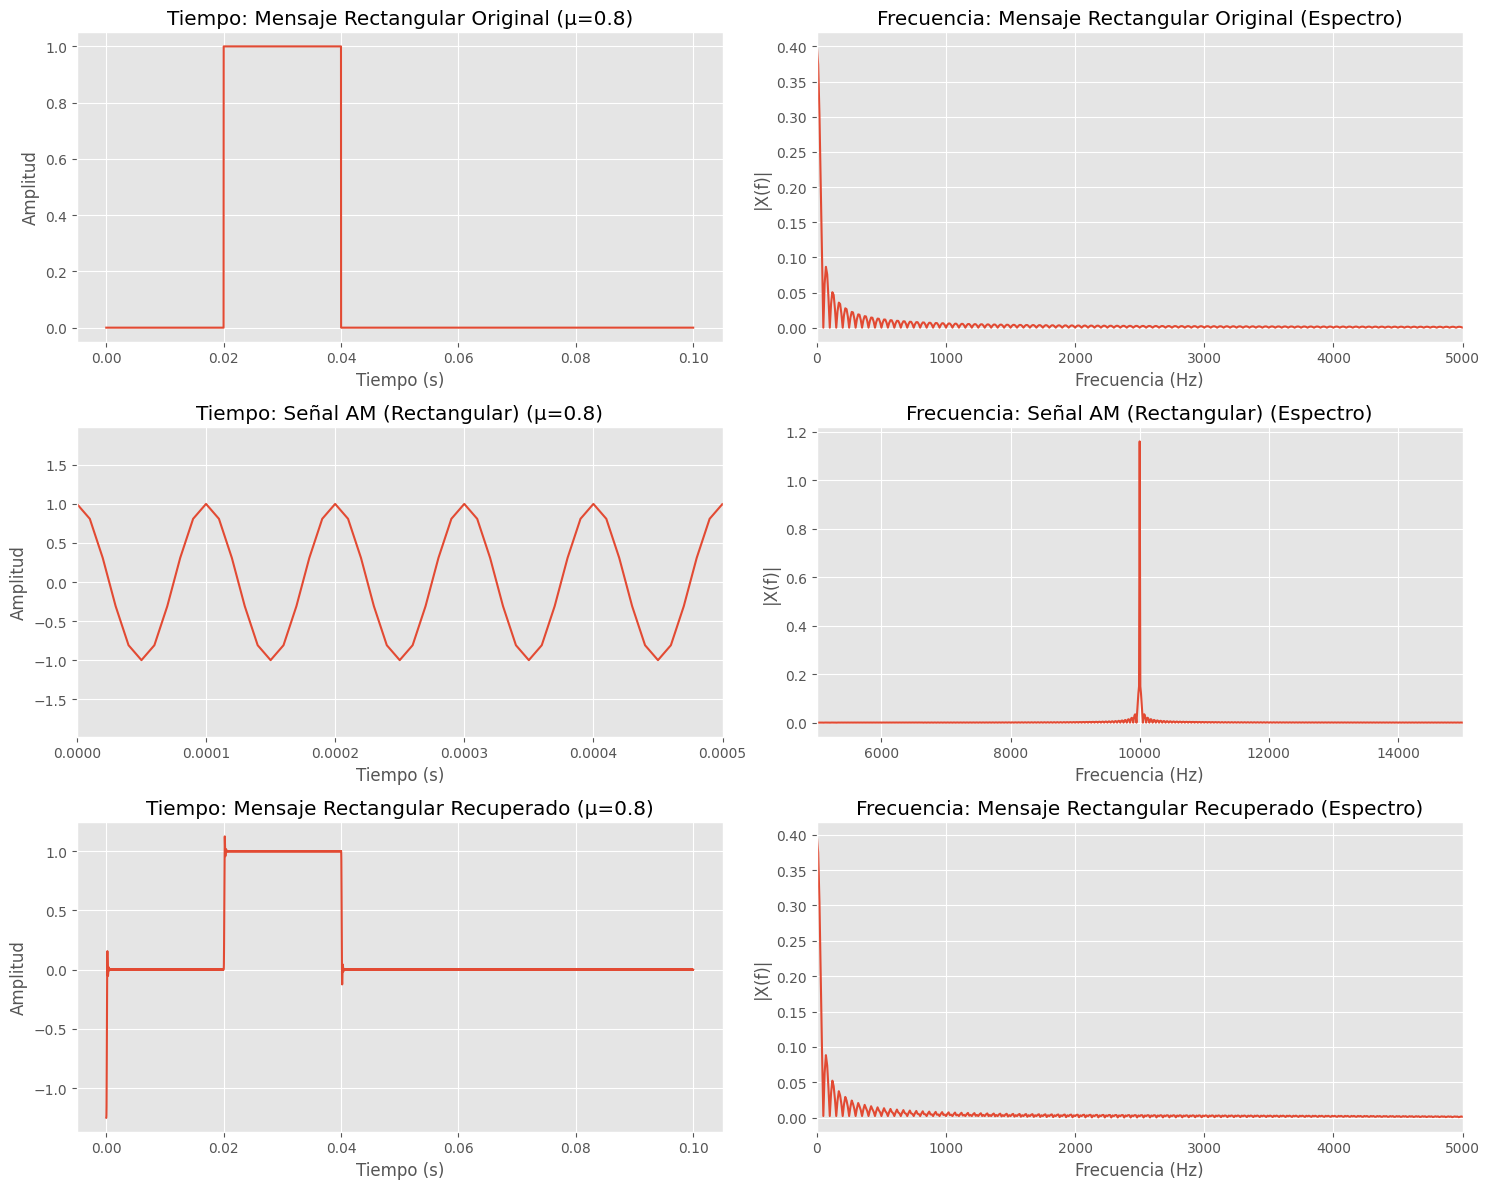


--- EJEMPLO 2: TIPO COSENO ---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from numpy.fft import rfft, rfftfreq

# Configuración de Matplotlib
plt.rcParams['figure.figsize'] = [15, 12]
plt.style.use('ggplot')

# --- Parámetros Generales ---
Fs = 100000      # Frecuencia de muestreo (Hz)
t = np.arange(0, 0.1, 1/Fs) # Vector de tiempo
Fc = 10000       # Frecuencia de la portadora (10 kHz)
Ac = 1           # Amplitud de la portadora

# --- Función de Modulación AM ---
def modulate_am(message_signal, index_mod):
    max_amp = np.max(np.abs(message_signal))
    m_normalized = message_signal / max_amp if max_amp > 0 else message_signal
    carrier = Ac * np.cos(2 * np.pi * Fc * t)
    s_am = Ac * (1 + index_mod * m_normalized) * carrier
    return s_am, m_normalized

# --- Función de Demodulación AM Coherente ---
def demodulate_am_coherent(am_signal, Fc, Ac, Fs, index_mod, order=5):
    # 1. Multiplicación por portadora local
    local_carrier = Ac * np.cos(2 * np.pi * Fc * t)
    multiplied_signal = am_signal * local_carrier

    # 2. Diseño y aplicación del Filtro Pasa Bajo (LPF)
    Fc_LPF = Fc / 2
    nyquist = 0.5 * Fs
    normal_cutoff = Fc_LPF / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    demodulated_signal = lfilter(b, a, multiplied_signal)

    # 3. Recuperación y escalado (eliminación del DC)
    dc_offset = (Ac * Ac) / 2 # K = Ac * Ac_local / 2
    epsilon = 1e-9 # Para manejar el caso mu=0
    recovered_m_norm = (demodulated_signal - dc_offset) / (dc_offset * (index_mod + epsilon))

    return recovered_m_norm

# --- Función de Gráficos (Tiempo y Frecuencia con rfft) ---
def plot_signals(t, signals, titles, Fs, Fc, mu_current):
    num_signals = len(signals)
    fig, axes = plt.subplots(num_signals, 2, figsize=(15, 4 * num_signals))
    N = len(t)

    for i, sig in enumerate(signals):
        # Gráfica en el tiempo
        axes[i, 0].plot(t, sig)
        axes[i, 0].set_title(f'Tiempo: {titles[i]} (μ={mu_current})')
        axes[i, 0].set_xlabel('Tiempo (s)')
        axes[i, 0].set_ylabel('Amplitud')
        axes[i, 0].grid(True)
        if "AM" in titles[i]: axes[i, 0].set_xlim(0, 5/Fc)

        # Gráfica en la frecuencia (rfft)
        yf = rfft(sig)
        xf = rfftfreq(N, 1 / Fs)

        axes[i, 1].plot(xf, 2/N * np.abs(yf))
        axes[i, 1].set_title(f'Frecuencia: {titles[i]} (Espectro)')
        axes[i, 1].set_xlabel('Frecuencia (Hz)')
        axes[i, 1].set_ylabel('|X(f)|')
        axes[i, 1].grid(True)
        if i == 0 or i == 2: axes[i, 1].set_xlim(0, 5000)
        else: axes[i, 1].set_xlim(Fc - 5000, Fc + 5000)

    plt.tight_layout()
    plt.show()

# --------------------------------------------------------
#               EJECUCIÓN DEL PROGRAMA
# --------------------------------------------------------

# --- 1. SEÑAL MENSAJE: PULSO RECTANGULAR ---
print("\n--- EJEMPLO 1: PULSO RECTANGULAR ---")
rect_message = np.zeros_like(t); rect_message[(t >= 0.02) & (t < 0.04)] = 1

try:
    mu_rect = float(input("Ingrese el índice de modulación (μ) para el pulso rectangular (ej. 0.8): "))
except ValueError:
    mu_rect = 0.8; print(f"Usando valor por defecto: {mu_rect}")

s_am_rect, m_norm_rect = modulate_am(rect_message, mu_rect)
recovered_rect_message = demodulate_am_coherent(s_am_rect, Fc, Ac, Fs, mu_rect)

plot_signals(t,
             [m_norm_rect, s_am_rect, recovered_rect_message],
             ['Mensaje Rectangular Original', 'Señal AM (Rectangular)', 'Mensaje Rectangular Recuperado'],
             Fs, Fc, mu_rect)


# --- 2. SEÑAL MENSAJE: TIPO COSENO ---
print("\n--- EJEMPLO 2: TIPO COSENO ---")
Fm_cos = 500
cos_message = np.cos(2 * np.pi * Fm_cos * t)

try:
    mu_cos = float(input("Ingrese el índice de modulación (μ) para el coseno (ej. 0.7): "))
except ValueError:
    mu_cos = 0.7; print(f"Usando valor por defecto: {mu_cos}")

s_am_cos, m_norm_cos = modulate_am(cos_message, mu_cos)
recovered_cos_message = demodulate_am_coherent(s_am_cos, Fc, Ac, Fs, mu_cos)

plot_signals(t,
             [m_norm_cos, s_am_cos, recovered_cos_message],
             ['Mensaje Coseno Original', 'Señal AM (Coseno)', 'Mensaje Coseno Recuperado'],
             Fs, Fc, mu_cos)

# 1.7 Aplicacion en circuitos electricos - potencia. Consulte en que consiste la distorsion total de armonicos ( Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsion del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el **calculo** del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones y pruebe con diferentes valores de R y C. Discuta los resultados obtenidos. Ver cuaderno Rectificador RC y THD.

#  Análisis de Distorsión Armónica ($\text{THD}$) y Factor de Potencia ($\text{PF}$)

Este cuaderno ilustra el cálculo de la Distorsión Total de Armónicos ($\text{THD}$) y el Factor de Distorsión ($\text{DF}$) utilizando la Transformada Rápida de Fourier ($\text{FFT}$) en dos escenarios típicos de un rectificador de onda completa: carga resistiva ($\text{R}$) y carga con filtro capacitivo ($\text{RC}$).

---

## 1. Distorsión Total de Armónicos ($\text{THD}$)

El $\text{THD}$ es una medida de la distorsión de una señal (generalmente de corriente) respecto a su forma ideal sinusoidal.

$$\text{THD}_I = \frac{I_{h(\text{RMS})}}{I_{1(\text{RMS})}} = \frac{\sqrt{\sum_{n=2}^{\infty} I_{n(\text{RMS})}^2}}{I_{1(\text{RMS})}}$$

Donde $I_{n(\text{RMS})}$ es el valor RMS del armónico $n$ y $I_{1(\text{RMS})}$ es el valor RMS del fundamental.

**Cálculo con $\text{FFT}$:** Se utiliza la magnitud de los coeficientes de la $\text{FFT}$ ($|X[n]|$):

$$\text{THD}_I \approx \frac{\sqrt{\sum_{n=2}^{K} |X[n]|^2}}{|X[1]|}$$

---

## 2. Factor de Potencia (PF) y Factor de Distorsión ($\text{DF}$)

El Factor de Potencia total ($\text{PF}$) en cargas no lineales se descompone en:
$$\mathbf{PF} = \underbrace{\cos(\phi_1)}_{\text{Factor de Desplazamiento}} \times \underbrace{\frac{1}{\sqrt{1 + \text{THD}_I^2}}}_{\text{Factor de Distorsión}}$$

El **Factor de Distorsión ($\text{DF}$)** cuantifica la reducción del $\text{PF}$ debido a los armónicos:
$$\mathbf{DF} = \frac{1}{\sqrt{1 + \text{THD}_I^2}}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definición de Constantes de Simulación ---
f_0 = 60  # Frecuencia fundamental (Hz)
T = 1 / f_0  # Periodo fundamental (s)
F_s = 20000  # Frecuencia de muestreo (Hz)
N_cycles = 10  # Número de ciclos a simular
K = int(N_cycles * F_s / f_0)  # Número total de puntos
t = np.linspace(0, N_cycles * T, K, endpoint=False) # Vector de tiempo
R = 10  # Resistencia (Ohmios) - Usada solo para escala

# --- 2. Generación de Señales de Corriente (Ejemplos Ilustrativos) ---

# i) Caso Carga R (Sinusoidal Rectificada)
# La forma de onda de la corriente de entrada de un rectificador de onda completa
# con carga resistiva pura es |sin(wt)| / R.
i_R = np.abs(np.sin(2 * np.pi * f_0 * t)) / R

# ii) Caso Carga RC en Serie (Pulsos Estrechos)
# Típico de un rectificador con filtro capacitivo. La corriente de entrada son
# pulsos cortos y altos (mayor THD).
i_RC = np.zeros_like(t)
pulse_width_ratio = 0.05  # Ancho de pulso del 5% del periodo
samples_per_cycle = F_s // f_0
pulse_width = int(pulse_width_ratio * samples_per_cycle)

# Generar pulsos de corriente cada medio ciclo (frecuencia 2*f_0)
for n in range(2 * N_cycles):
    start_index = int(n * samples_per_cycle / 2)
    end_index = start_index + pulse_width
    if end_index < K:
        i_RC[start_index:end_index] = 1.0

# --- 3. Función de Cálculo de THD y Factor de Distorsión ---
def calculate_thd_and_df(i_t, F_s, f_0, num_harmonics=100):
    """Calcula el THD y el Factor de Distorsión (DF) de una señal."""
    K = len(i_t)
    # 1. Aplicar la Transformada Rápida de Fourier (FFT para señales reales)
    X_fft = np.fft.rfft(i_t)
    X_mag = np.abs(X_fft)

    # 2. Calcular el vector de frecuencias
    freqs = np.fft.rfftfreq(K, 1 / F_s)

    # 3. Identificar el fundamental
    fundamental_idx = np.argmin(np.abs(freqs - f_0))
    X1 = X_mag[fundamental_idx]

    # 4. Encontrar los armónicos
    X_harmonics = []

    for n in range(2, num_harmonics + 1):
        harmonic_freq = n * f_0
        if harmonic_freq > F_s / 2:
            break

        # Encontrar el índice del armónico n
        harmonic_idx = np.argmin(np.abs(freqs - harmonic_freq))
        X_harmonics.append(X_mag[harmonic_idx])

    X_harmonics = np.array(X_harmonics)

    # 5. Cálculo del THD_I (cociente de RMS, se usa la magnitud de los coeficientes)
    THD_I = np.sqrt(np.sum(X_harmonics**2)) / X1

    # 6. Cálculo del Factor de Distorsión (DF)
    DF = 1 / np.sqrt(1 + THD_I**2)

    # Se devuelve el índice fundamental para la gráfica
    return THD_I, DF, freqs, X_mag, fundamental_idx

# --- 4. Análisis y Resultados ---

# i) Caso Carga R
thd_R, df_R, freqs_R, X_mag_R, fund_idx_R = calculate_thd_and_df(i_R, F_s, f_0)

# ii) Caso Carga RC
thd_RC, df_RC, freqs_RC, X_mag_RC, fund_idx_RC = calculate_thd_and_df(i_RC, F_s, f_0)

# Imprimir resultados
print(f"--- Análisis Rectificador Carga R (Aprox. Sinusoidal Rectificada) ---")
print(f"THD_I (Corriente): {thd_R * 100:.2f} %")
print(f"Factor de Distorsión (DF): {df_R:.4f}")

print(f"\n--- Análisis Rectificador Carga RC (Aprox. Pulsos Estrechos) ---")
print(f"THD_I (Corriente): {thd_RC * 100:.2f} %")
print(f"Factor de Distorsión (DF): {df_RC:.4f}")

--- Análisis Rectificador Carga R (Aprox. Sinusoidal Rectificada) ---
THD_I (Corriente): 153902420.55 %
Factor de Distorsión (DF): 0.0000

--- Análisis Rectificador Carga RC (Aprox. Pulsos Estrechos) ---
THD_I (Corriente): 34368.54 %
Factor de Distorsión (DF): 0.0029


CONCEPTOS BBBBB